Final project submissiion


1. PDF format
 a. CA1 ( intro)
    what, why, which domain, information, questions/ planning
    
    
b. Visualizations and conclusions ( no jupyter notebook is required. Just visualize and conclude)4


c. Final conclusions



d. References like git, kaggle or any website used while working on the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# About Dataset


Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view.

Even more than with other data sets, there’s a huge amount of data cleaning and preparation that goes into putting together a long-time study of climate trends. Early data was collected by technicians using mercury thermometers, where any variation in the visit time impacted measurements. In the 1940s, the construction of airports caused many weather stations to be moved. In the 1980s, there was a move to electronic thermometers that are said to have a cooling bias.

Given this complexity, there are a range of organizations that collate climate trends data. The three most cited land and ocean temperature data sets are NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut.

We have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In this dataset, we have include several files:

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

**Date:** starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures


**LandAverageTemperature:** global average land temperature in celsius


**LandAverageTemperatureUncertainty:** the 95% confidence interval around the average


**LandMaxTemperature:** global average maximum land temperature in celsius


**LandMaxTemperatureUncertainty:** the 95% confidence interval around the maximum land temperature


**LandMinTemperature:** global average minimum land temperature in celsius


**LandMinTemperatureUncertainty:** the 95% confidence interval around the minimum land temperature


**LandAndOceanAverageTemperature:** global average land and ocean temperature in celsius


**LandAndOceanAverageTemperatureUncertainty:** the 95% confidence interval around the global average land and ocean temperature



## Possible Deductions

Here the aim to discover whether the cilmate change is real or not or is it actually just a huge controversy created by huge corporations.

In [2]:
globalTemp = pd.read_csv("GlobalTemperatures.csv")

In [3]:
globalTemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
globalTemp.shape

(3192, 9)

In [5]:
globalTemp.size

28728

In [6]:
globalTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [7]:
globalTemp.size

28728

## Data cleaning

In [8]:
globalTemp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

Average temperature and average temp certainity only have 12 null values which can easily be removed

In [9]:
globalTemp = globalTemp[-globalTemp["LandAverageTemperature"].isnull()]

In [10]:
globalTemp.isnull().sum()

dt                                              0
LandAverageTemperature                          0
LandAverageTemperatureUncertainty               0
LandMaxTemperature                           1188
LandMaxTemperatureUncertainty                1188
LandMinTemperature                           1188
LandMinTemperatureUncertainty                1188
LandAndOceanAverageTemperature               1188
LandAndOceanAverageTemperatureUncertainty    1188
dtype: int64

<BarContainer object of 3180 artists>

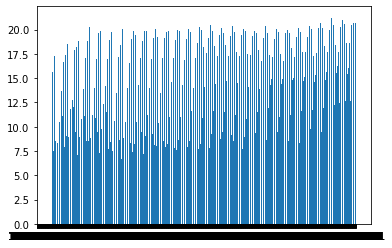

In [11]:
plt.bar( globalTemp["dt"], globalTemp["LandMaxTemperature"])

In [12]:
globalCity = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [13]:
globalCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
